In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [32]:
raw_data = {
    "Timestamp": [
        "2025-01-01 08:00", "2025-01-01 09:00", "2025-01-01 10:00",
        "2025-01-01 11:00", "2025-01-01 12:00", "2025-01-01 13:00"
    ],
    "Heart_Rate": [72, np.nan, 85, 120, 130, np.nan],  # Glitchy sensor
    "Oxygen_Level": [98, 97, 99, 92, 88, 95]           # Dropping oxygen
    }

Load: Create the DataFrame and convert "Timestamp" to a datetime object. Set it as the Index.

In [33]:
df = pd.DataFrame(raw_data)
print(df)

          Timestamp  Heart_Rate  Oxygen_Level
0  2025-01-01 08:00        72.0            98
1  2025-01-01 09:00         NaN            97
2  2025-01-01 10:00        85.0            99
3  2025-01-01 11:00       120.0            92
4  2025-01-01 12:00       130.0            88
5  2025-01-01 13:00         NaN            95


In [34]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df

,Timestamp,Heart_Rate,Oxygen_Level
0,2025-01-01 08:00:00,72.0,98
1,2025-01-01 09:00:00,NaN,97
2,2025-01-01 10:00:00,85.0,99
3,2025-01-01 11:00:00,120.0,92
4,2025-01-01 12:00:00,130.0,88
5,2025-01-01 13:00:00,NaN,95


In [35]:
df.set_index('Timestamp', inplace=True)

In [36]:
df

,Heart_Rate,Oxygen_Level
Timestamp,,
2025-01-01 08:00:00,72.0,98
2025-01-01 09:00:00,NaN,97
2025-01-01 10:00:00,85.0,99
2025-01-01 11:00:00,120.0,92
2025-01-01 12:00:00,130.0,88
2025-01-01 13:00:00,NaN,95


Clean:

The Heart Rate sensor failed twice. Fill the NaNs using Linear Interpolation (df.interpolate()). This connects the dots between 72 and 85, instead of just taking the average.

In [37]:
df = df.interpolate(method = 'linear')
df

,Heart_Rate,Oxygen_Level
Timestamp,,
2025-01-01 08:00:00,72.0,98
2025-01-01 09:00:00,78.5,97
2025-01-01 10:00:00,85.0,99
2025-01-01 11:00:00,120.0,92
2025-01-01 12:00:00,130.0,88
2025-01-01 13:00:00,130.0,95


Engineer:

Create a new column called "Risk_Score".

Formula: Risk_Score = Heart_Rate / Oxygen_Level. (Higher is worse).

In [38]:
df['Risk_Score'] = df["Heart_Rate"]/df["Oxygen_Level"]
df

,Heart_Rate,Oxygen_Level,Risk_Score
Timestamp,,,
2025-01-01 08:00:00,72.0,98,0.734694
2025-01-01 09:00:00,78.5,97,0.809278
2025-01-01 10:00:00,85.0,99,0.858586
2025-01-01 11:00:00,120.0,92,1.304348
2025-01-01 12:00:00,130.0,88,1.477273
2025-01-01 13:00:00,130.0,95,1.368421


Filter:

Find the exact hour where the Risk_Score was highest (Use idxmax() or sorting). Print that timestamp.

In [44]:
peak_time= df["Risk_Score"].idxmax()
peak_time

Timestamp('2025-01-01 12:00:00')

Visualize (The Dashboard):

Create a Subplot (2 charts stacked on top of each other).

Top Chart: Heart Rate (Red Line).

Bottom Chart: Oxygen Level (Blue Line).

Add a Vertical Line (plt.axvline) on both charts at the timestamp where the Risk Score peaked.

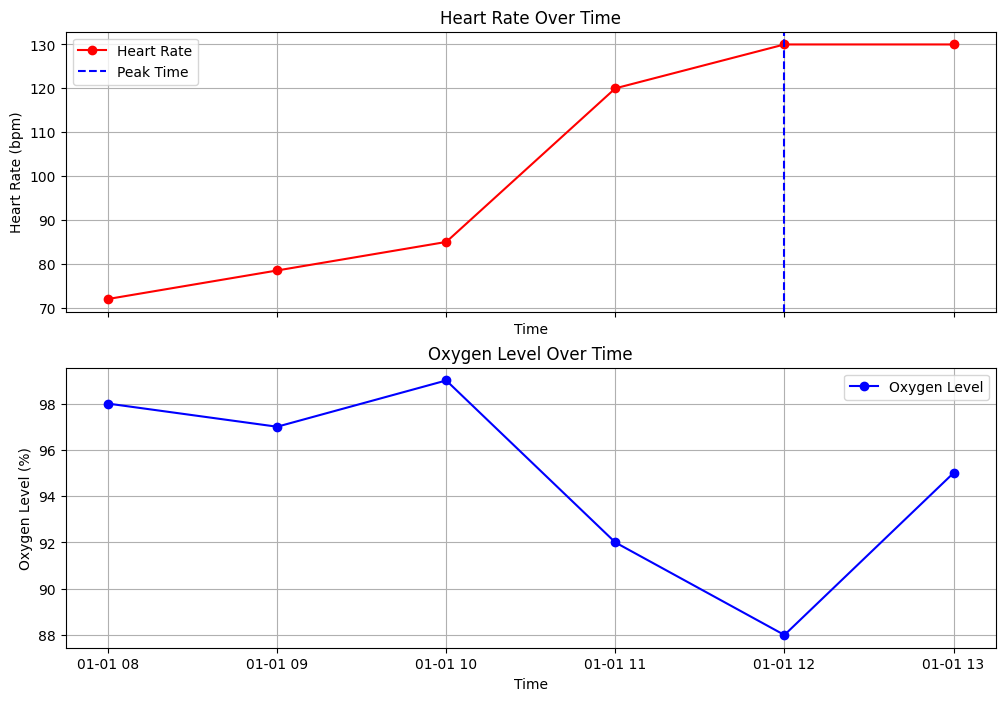

In [48]:
fig , ax = plt.subplots(2, 1, figsize=(12,8), sharex=True)


# top chart 

ax[0].plot(df.index, df["Heart_Rate"], color='red', marker='o', label="Heart Rate")
ax[0].axvline(peak_time , color='blue', linestyle='--',label="Peak Time" ,linewidth=1.5)
ax[0].set_ylabel("Heart Rate (bpm)")
ax[0].set_xlabel("Time")
ax[0].set_title("Heart Rate Over Time")
ax[0].grid(True)
ax[0].legend()

# bottom chart

ax[1].plot(df.index , df["Oxygen_Level"], color = 'blue', marker = 'o' , label="Oxygen Level")
ax[1].set_title("Oxygen Level Over Time")
ax[1].grid(True)
ax[1].set_ylabel("Oxygen Level (%)")
ax[1].set_xlabel("Time")
ax[1].legend()
